# Homework Assignment  6

In [ ]:
!pip install turicreate
!pip install kaggle
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn

  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.18.5 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
jaxlib 0.3.7+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.8 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have foli

  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.0.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review.
Evaluate the classifier using the rest of the data (30pt).


In [ ]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"","key":""}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets list -s 'Amazon Fine Food Reviews'

ref                                       title                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------  ------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/snap/amazon-fine-food-reviews    Amazon Fine Food Reviews  242MB  2017-05-01 18:51:31         119892       1860  0.7941176        
datasets/ajaysh/amazon-fine-food-reviews  Amazon Fine Food Reviews  128MB  2018-05-15 10:01:32            292          7  0.4117647        
datasets/wolfram77/graphs-online-reviews  Online reviews Graphs       3GB  2021-11-12 07:43:43              8          1  0.84375          
datasets/apoorvaduraisamy/mydataset       mydataset                  14KB  2021-02-05 14:48:11              0          0  0.0              


In [ ]:
!mkdir ./datasets
!mkdir ./datasets/amazon-fine-food-reviews

# download the dataset from Kaggle and unzip it
!kaggle datasets download snap/amazon-fine-food-reviews -p ./datasets/amazon-fine-food-reviews
!unzip ./datasets/amazon-fine-food-reviews/*.zip  -d ./datasets/amazon-fine-food-reviews/


mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/amazon-fine-food-reviews’: File exists
amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/amazon-fine-food-reviews/amazon-fine-food-reviews.zip
replace ./datasets/amazon-fine-food-reviews/Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/amazon-fine-food-reviews/Reviews.csv  
replace ./datasets/amazon-fine-food-reviews/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/amazon-fine-food-reviews/database.sqlite  
replace ./datasets/amazon-fine-food-reviews/hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/amazon-fine-food-reviews/hashes.txt  


In [ ]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/amazon-fine-food-reviews/Reviews.csv")
sf

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon-fine-food-reviews/Reviews.csv

Parsing completed. Parsed 100 lines in 1.44182 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 50162.1

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amazon-fine-food-reviews/Reviews.csv

Parsing completed. Parsed 260995 lines in 3.65289 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


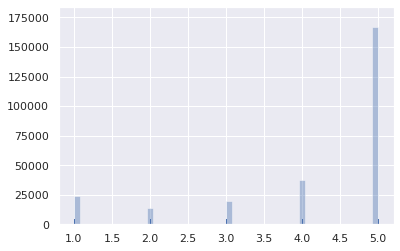

In [ ]:
import seaborn as sns
sns.set()
sns.distplot(sf['Score'], kde=False, rug=True)

In [ ]:
sf.groupby('Score', tc.aggregate.COUNT()).sort("Count", ascending=False)

Score,Count
5,167252
4,37097
1,23630
3,19562
2,13454


In [ ]:
sf = sf[sf['Score'] != 3]
def score2sentiment(score):
    if score >= 4:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['Score'].apply(lambda score: score2sentiment(score))
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [ ]:
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['Text'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['Text'], n=2, method='word')
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [ ]:
train, test = sf.random_split(0.8)
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1527754

Number of coefficients      : 1527755

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.080447  | 8.847153     | 0.847160          | 0.843085            |

| 1         | 9        | 1.689389  | 14.956699    | 0.922394          | 0.873165            |

| 2         | 10       | 1.689389  | 17.118211    | 0.995588          | 0.945111            |

| 3         | 11       | 1.689389  | 19.318294    | 0.997884          | 0.947488            |

| 4         | 13       | 1.689389  | 22.888067    | 0.999173          | 0.950176            |

| 6         | 15       | 1.689389  | 27.348418    | 0.999848          | 0.952967            |

| 7         | 16       | 1.689389  | 29.638233    | 0.999913          | 0.953897            |

| 8         | 21       | 1.162073  | 37.234520    | 0.999940          | 0.954207            |

| 9         | 22       | 1.162073  | 39.523332    | 0.999956          | 0.954414            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1527754

Number of coefficients    : 1527755

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.082400  | 5.969867     | 0.847160          | 0.843085            |

| 1         | 11       | 4.367205  | 13.823744    | 0.992693          | 0.947695            |

| 2         | 16       | 3.821300  | 20.490627    | 0.998395          | 0.953173            |

| 3         | 17       | 3.821300  | 22.488926    | 0.999440          | 0.945214            |

| 4         | 19       | 1.393190  | 25.712495    | 0.999587          | 0.950486            |

| 6         | 21       | 1.393190  | 29.806635    | 0.999908          | 0.951933            |

| 7         | 22       | 1.393190  | 31.856374    | 0.999929          | 0.951520            |

| 8         | 28       | 1.142145  | 39.658765    | 0.999918          | 0.951933            |

| 9         | 29       | 1.142145  | 41.690152    | 0.999935          | 0.951209            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9544138929088278
PROGRESS: SVMClassifier                   : 0.9512094273309902
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [ ]:
cls.evaluate(test)

{'accuracy': 0.9520632206676536,
 'auc': 0.9638602058613439,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |  576  |
 |   Positive   |     Positive    | 39975 |
 |   Negative   |     Negative    |  5685 |
 |   Negative   |     Positive    |  1723 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9720482923804545,
 'log_loss': 0.16300644064759545,
 'precision': 0.9586790733368507,
 'recall': 0.9857956647185027,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

Construct a sentiment classifier using features from the TextBlob package:


In [ ]:
from textblob import TextBlob

train['text_blob_score'] = train['Text'].apply(lambda t: TextBlob(t).sentiment.polarity)
test['text_blob_score'] = test['Text'].apply(lambda t: TextBlob(t).sentiment.polarity)
train

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [ ]:
cls_text_blob = tc.classifier.create(train,features=['text_blob_score'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.079910     | 0.867236          | 0.862208            | 0.539094          | 0.540793            |

| 2         | 0.153116     | 0.867252          | 0.863345            | 0.456308          | 0.459139            |

| 3         | 0.230329     | 0.867726          | 0.863655            | 0.407062          | 0.410746            |

| 4         | 0.306062     | 0.867835          | 0.863965            | 0.376627          | 0.380918            |

| 5         | 0.386103     | 0.867497          | 0.863552            | 0.357584          | 0.362407            |

| 10        | 0.739263     | 0.867927          | 0.863035            | 0.328087          | 0.334697            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.088029     | 0.867187          | 0.862001            | 0.360331          | 0.365235            |

| 2         | 0.161199     | 0.867541          | 0.863242            | 0.359870          | 0.364569            |

| 3         | 0.241333     | 0.867122          | 0.862932            | 0.359912          | 0.364708            |

| 4         | 0.312091     | 0.867165          | 0.863035            | 0.359945          | 0.364661            |

| 5         | 0.382270     | 0.867144          | 0.863138            | 0.359939          | 0.364684            |

| 10        | 0.725038     | 0.867133          | 0.863035            | 0.359888          | 0.364483            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.082416     | 0.867236          | 0.862208            | 0.360221          | 0.364973            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.105254     | 0.852894          | 0.853111            |

| 1         | 5        | 5.000000  | 0.180161     | 0.866023          | 0.862105            |

| 2         | 7        | 4.518893  | 0.257199     | 0.799064          | 0.793570            |

| 3         | 11       | 1.764988  | 0.380273     | 0.857171          | 0.856006            |

| 4         | 12       | 1.764988  | 0.437873     | 0.846616          | 0.846599            |

| 9         | 26       | 0.399394  | 0.884647     | 0.847274          | 0.847426            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.217029     | 0.854619          | 0.853938            |

| 2         | 3        | 0.350783     | 0.862339          | 0.860554            |

| 3         | 4        | 0.478262     | 0.864995          | 0.862001            |

| 4         | 5        | 0.614462     | 0.865229          | 0.862725            |

| 5         | 6        | 0.743299     | 0.865250          | 0.863035            |

| 6         | 7        | 0.874195     | 0.865250          | 0.863035            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8630349390117842
PROGRESS: RandomForestClassifier          : 0.8630349390117842
PROGRESS: DecisionTreeClassifier          : 0.8621046102956378
PROGRESS: SVMClassifier                   : 0.847426090551995
PROGRESS: LogisticClassifier              : 0.8630349390117842
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [ ]:
result_text_blob = cls_text_blob.evaluate(test)
result_text_blob

{'accuracy': 0.8662399132592423,
 'auc': 0.8215284293495325,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |  1095 |
 |   Negative   |     Negative    |  2088 |
 |   Positive   |     Positive    | 39456 |
 |   Negative   |     Positive    |  5320 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9248186388833547,
 'log_loss': 0.3332974276183559,
 'precision': 0.8811863498302662,
 'recall': 0.9729969667825701,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 40551 | 7408 |
 |   0.001   | 1.0 | 1.0 | 40551 | 7408 |
 |   0.002   | 1

Construct a sentiment classifier using features from the affin package:

In [ ]:
from afinn import Afinn
afinn = Afinn()

train['afinn_score'] = train['Text'].apply(lambda t: afinn.score(t))
test['afinn_score'] = test['Text'].apply(lambda t: afinn.score(t))
train

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [ ]:
cls_afinn = tc.classifier.create(train,features=['afinn_score'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.077702     | 0.862492          | 0.869030            | 0.545882          | 0.543025            |

| 2         | 0.150130     | 0.862492          | 0.869030            | 0.467459          | 0.462535            |

| 3         | 0.221417     | 0.862492          | 0.869030            | 0.421813          | 0.415269            |

| 4         | 0.300329     | 0.862492          | 0.869030            | 0.394399          | 0.386544            |

| 5         | 0.375865     | 0.862492          | 0.869030            | 0.377822          | 0.368894            |

| 10        | 0.739524     | 0.862492          | 0.869030            | 0.355493          | 0.343707            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.078019     | 0.862492          | 0.869030            | 0.376926          | 0.367676            |

| 2         | 0.142646     | 0.862492          | 0.869030            | 0.376966          | 0.367787            |

| 3         | 0.208399     | 0.862492          | 0.869030            | 0.376967          | 0.367811            |

| 4         | 0.273428     | 0.862492          | 0.869030            | 0.376959          | 0.367801            |

| 5         | 0.336832     | 0.862492          | 0.869030            | 0.376962          | 0.367801            |

| 10        | 0.643773     | 0.862492          | 0.869030            | 0.376992          | 0.367830            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.078938     | 0.862492          | 0.869030            | 0.376975          | 0.367837            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.108526     | 0.847650          | 0.856833            |

| 1         | 7        | 3.750000  | 0.216501     | 0.853977          | 0.861278            |

| 2         | 8        | 3.750000  | 0.267763     | 0.153520          | 0.144408            |

| 3         | 12       | 0.403047  | 0.378059     | 0.853977          | 0.861278            |

| 4         | 13       | 0.503808  | 0.427873     | 0.852089          | 0.860244            |

| 9         | 26       | 0.792587  | 0.831315     | 0.846143          | 0.855592            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 183800

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.232079     | 0.846621          | 0.855696            |

| 2         | 3        | 0.535041     | 0.852089          | 0.860244            |

| 3         | 4        | 0.780457     | 0.855974          | 0.863242            |

| 4         | 5        | 0.904596     | 0.855974          | 0.863242            |

| 5         | 6        | 1.032825     | 0.855974          | 0.863242            |

| 6         | 7        | 1.161376     | 0.855974          | 0.863242            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8690303907380608
PROGRESS: RandomForestClassifier          : 0.8690303907380608
PROGRESS: DecisionTreeClassifier          : 0.8690303907380608
PROGRESS: SVMClassifier                   : 0.8555923092826132
PROGRESS: LogisticClassifier              : 0.8632416787264834
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [ ]:
result_afinn = cls_afinn.evaluate(test)
result_afinn

{'accuracy': 0.8644884171896828,
 'auc': 0.7671784868218899,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |  971  |
 |   Positive   |     Positive    | 39580 |
 |   Negative   |     Positive    |  5528 |
 |   Negative   |     Negative    |  1880 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9241293967942656,
 'log_loss': 0.35628437962220044,
 'precision': 0.8774496763323579,
 'recall': 0.9760548445167814,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 40551 | 7408 |
 |   0.001   | 1.0 | 1.0 | 40551 | 7408 |
 |   0.002   | 

Compare the two classifiers results and visualize it:

In [ ]:
import pandas as pd

#evaluations = pd.DataFrame(result_text_blob['accuracy','auc','f1_score','log_loss','precision','recall'])
blob = { val: result_text_blob[val] for val in ['accuracy','auc','f1_score','log_loss','precision','recall'] }
affin = { val: result_afinn[val] for val in ['accuracy','auc','f1_score','log_loss','precision','recall'] }

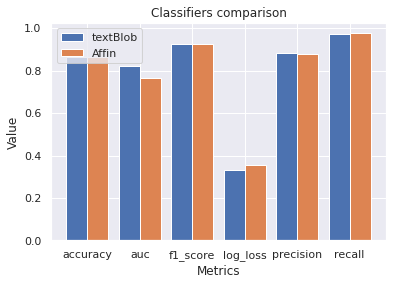

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['accuracy','auc','f1_score','log_loss','precision','recall']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, blob.values(), 0.4, label = 'textBlob')
plt.bar(X_axis + 0.2, affin.values(), 0.4, label = 'Affin')

plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.title("Classifiers comparison")
plt.legend()
plt.show()

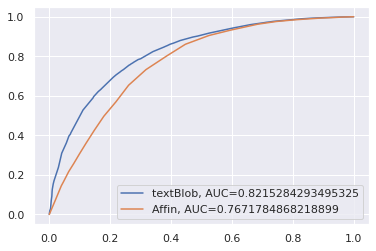

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0).clf()
plt.plot(result_text_blob['roc_curve']['fpr'],result_text_blob['roc_curve']['tpr'],label="textBlob, AUC="+str(result_text_blob['auc']))
plt.plot(result_afinn['roc_curve']['fpr'],result_afinn['roc_curve']['tpr'],label="Affin, AUC="+str(result_afinn['auc']))

#add legend
plt.legend()

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [ ]:
import spacy
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install
nlp = spacy.load('en_core_web_lg')

     |████████████████████████████████| 827.9 MB 565 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
!mkdir ./datasets/hotel-review

# download the dataset from Kaggle and unzip it
!kaggle datasets download anu0012/hotel-review -p ./datasets/hotel-review
!unzip ./datasets/hotel-review/*.zip  -d ./datasets/hotel-review/

 23% 5.00M/21.7M [00:01<00:04, 3.87MB/s]
100% 21.7M/21.7M [00:01<00:00, 15.7MB/s]
Archive:  ./datasets/hotel-review/hotel-review.zip
  inflating: ./datasets/hotel-review/test.csv  
  inflating: ./datasets/hotel-review/train.csv  


In [ ]:
h_sf = tc.SFrame.read_csv("./datasets/hotel-review/train.csv")
h_sf['words_1grams'] = tc.text_analytics.count_ngrams(h_sf['Description'], n=1, method='word')
h_sf['words_1grams'] = h_sf['words_1grams'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
h_sf['words_2grams'] = tc.text_analytics.count_ngrams(h_sf['Description'], n=2, method='word')
h_sf = h_sf.rename({"Is_Response": 'sentiment'})
h_sf = h_sf[h_sf['sentiment'].apply(lambda s: s=='happy' or s=='not happy')]
h_sf.materialize()
h_sf

Finished parsing file /content/datasets/hotel-review/train.csv

Parsing completed. Parsed 100 lines in 1.441 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/hotel-review/train.csv

Parsing completed. Parsed 38932 lines in 0.868738 secs.

User_ID,Description,Browser_Used,Device_Used,sentiment,words_1grams
id10326,The room was kind ofclean but had a VERY ...,Edge,Mobile,not happy,"{'breakfast': 1, 'price':1, 'staying': 1, 'fus ..."
id10327,I stayed at the CrownPlaza April -- - April ...,Internet Explorer,Mobile,not happy,"{'vacation': 1,'business': 1, 'stay' ..."
id10328,I booked this hotelthrough Hotwire at the ...,Mozilla,Tablet,not happy,"{'station': 2,'mcpherson': 1, 'view': ..."
id10329,Stayed here with husbandand sons on the way t ...,InternetExplorer,Desktop,happy,"{'beds': 1, 'heavenly':2, 'forgot': 1, 'walk': ..."
id10330,My girlfriends and Istayed here to celebrate ...,Edge,Tablet,not happy,"{'recommend': 1,'seaons': 1, 'stay': 1, ..."
id10331,We had - rooms. One wasvery nice and clearly ...,InternetExplorer,Desktop,happy,"{'stay': 1, 'vacation':1, 'good': 1, 'floors': ..."
id10332,My husband and I havestayed in this hotel a ...,Firefox,Tablet,not happy,"{'stay': 1, 'breakfast':1, 'internet': 1, ..."
id10333,My wife & I stayed inthis glorious city a ...,Google Chrome,Mobile,happy,"{'charm': 1, 'helpful':2, 'day': 1, 'small': 1, ..."
id10334,My boyfriend and I stayedat the Fairmont on a ...,Internet Explorer,Desktop,happy,"{'bowl': 1, 'strong': 1,'scorpion': 1, ..."
id10335,"Wonderful staff, greatlocation, but it was ...",Chrome,Tablet,not happy,"{'shampoo': 1, 'line': 1,'ginger': 1, 'white': 1, ..."


In [ ]:
from tqdm import tqdm
l = []
for i in tqdm(range(len(h_sf))):
    text = h_sf[i]["Description"]
    l.append(nlp(text).vector)
h_sf['vector'] = l
h_sf

100%|██████████| 38932/38932 [25:26<00:00, 25.50it/s]


User_ID,Description,Browser_Used,Device_Used,sentiment,words_1grams
id10326,The room was kind ofclean but had a VERY ...,Edge,Mobile,not happy,"{'breakfast': 1, 'price':1, 'staying': 1, 'fus ..."
id10327,I stayed at the CrownPlaza April -- - April ...,Internet Explorer,Mobile,not happy,"{'vacation': 1,'business': 1, 'stay' ..."
id10328,I booked this hotelthrough Hotwire at the ...,Mozilla,Tablet,not happy,"{'station': 2,'mcpherson': 1, 'view': ..."
id10329,Stayed here with husbandand sons on the way t ...,InternetExplorer,Desktop,happy,"{'beds': 1, 'heavenly':2, 'forgot': 1, 'walk': ..."
id10330,My girlfriends and Istayed here to celebrate ...,Edge,Tablet,not happy,"{'recommend': 1,'seaons': 1, 'stay': 1, ..."
id10331,We had - rooms. One wasvery nice and clearly ...,InternetExplorer,Desktop,happy,"{'stay': 1, 'vacation':1, 'good': 1, 'floors': ..."
id10332,My husband and I havestayed in this hotel a ...,Firefox,Tablet,not happy,"{'stay': 1, 'breakfast':1, 'internet': 1, ..."
id10333,My wife & I stayed inthis glorious city a ...,Google Chrome,Mobile,happy,"{'charm': 1, 'helpful':2, 'day': 1, 'small': 1, ..."
id10334,My boyfriend and I stayedat the Fairmont on a ...,Internet Explorer,Desktop,happy,"{'bowl': 1, 'strong': 1,'scorpion': 1, ..."
id10335,"Wonderful staff, greatlocation, but it was ...",Chrome,Tablet,not happy,"{'shampoo': 1, 'line': 1,'ginger': 1, 'white': 1, ..."


In [ ]:
train, test  = h_sf.random_split(0.8)
cls1 = tc.random_forest_classifier.create(train,features=['vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 29487

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.390910     | 0.798182          | 0.767397            | 0.454272          | 0.480980            |

| 2         | 2.789749     | 0.811069          | 0.788015            | 0.440808          | 0.460697            |

| 3         | 4.311983     | 0.815546          | 0.797036            | 0.436530          | 0.454347            |

| 4         | 5.618613     | 0.816258          | 0.800902            | 0.434495          | 0.451058            |

| 5         | 6.225275     | 0.816292          | 0.795103            | 0.433849          | 0.449882            |

| 10        | 9.306937     | 0.823888          | 0.806701            | 0.428536          | 0.444096            |

| 15        | 12.335259    | 0.826568          | 0.803479            | 0.427263          | 0.442329            |

| 20        | 15.402941    | 0.826398          | 0.806057            | 0.426682          | 0.441026            |

| 25        | 18.445787    | 0.828026          | 0.810567            | 0.425343          | 0.440633            |

| 30        | 21.485919    | 0.826805          | 0.809923            | 0.425676          | 0.440969            |

| 35        | 24.500490    | 0.828060          | 0.813789            | 0.425029          | 0.440195            |

| 40        | 27.518341    | 0.828535          | 0.812500            | 0.425062          | 0.439989            |

| 45        | 30.564646    | 0.828670          | 0.814433            | 0.425250          | 0.440117            |

| 50        | 33.624465    | 0.828331          | 0.811856            | 0.425529          | 0.440361            |

| 55        | 36.655424    | 0.827687          | 0.813144            | 0.425499          | 0.440017            |

| 60        | 39.677311    | 0.828738          | 0.811856            | 0.425391          | 0.440176            |

| 65        | 42.678564    | 0.828602          | 0.815077            | 0.425356          | 0.440218            |

| 70        | 45.724602    | 0.828840          | 0.815077            | 0.425555          | 0.440379            |

| 75        | 48.788077    | 0.828602          | 0.814433            | 0.425666          | 0.440608            |

| 80        | 51.847769    | 0.828535          | 0.812500            | 0.425588          | 0.440571            |

| 85        | 54.895146    | 0.828060          | 0.813789            | 0.425708          | 0.440399            |

| 90        | 57.950373    | 0.827415          | 0.812500            | 0.425683          | 0.440395            |

| 95        | 60.996916    | 0.827517          | 0.812500            | 0.425598          | 0.440209            |

| 100       | 64.046059    | 0.827755          | 0.814433            | 0.425631          | 0.440287            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [ ]:
cls1.evaluate(test)

{'accuracy': 0.8033700747497783,
 'auc': 0.8662370991348861,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    happy     |    not happy    |  458  |
 |    happy     |      happy      |  4912 |
 |  not happy   |      happy      |  1094 |
 |  not happy   |    not happy    |  1429 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6480725623582767,
 'log_loss': 0.45139463726952,
 'precision': 0.7572866984631691,
 'recall': 0.5663892191835117,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 2523 | 5370 |
 |   0.001   | 1.0 | 1.0 | 2523 | 5370 |
 |   0.002   | 1.0 | 1.

In [ ]:
cls2 = tc.random_forest_classifier.create(train,features=['words_1grams', 'words_2grams', 'vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 29487

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 730632

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.387647     | 0.803608          | 0.776417            | 0.454922          | 0.482801            |

| 2         | 4.484539     | 0.813816          | 0.796392            | 0.444139          | 0.468567            |

| 3         | 6.551239     | 0.815478          | 0.804124            | 0.438918          | 0.462859            |

| 4         | 8.608352     | 0.816021          | 0.802835            | 0.437309          | 0.457932            |

| 5         | 10.639908    | 0.821888          | 0.809923            | 0.430943          | 0.450737            |

| 10        | 20.710416    | 0.825381          | 0.810567            | 0.427655          | 0.448297            |

| 15        | 30.986191    | 0.829993          | 0.809923            | 0.424744          | 0.446955            |

| 20        | 41.084735    | 0.833282          | 0.816366            | 0.423294          | 0.445710            |

| 25        | 51.332895    | 0.833316          | 0.818299            | 0.423146          | 0.445700            |

| 30        | 61.363923    | 0.831451          | 0.814433            | 0.423539          | 0.445353            |

| 35        | 71.498303    | 0.832129          | 0.808634            | 0.423163          | 0.445245            |

| 40        | 81.519814    | 0.832740          | 0.811856            | 0.422947          | 0.445026            |

| 45        | 91.605435    | 0.832740          | 0.812500            | 0.422718          | 0.445047            |

| 50        | 101.577506   | 0.832367          | 0.811211            | 0.422842          | 0.445176            |

| 55        | 111.702979   | 0.832604          | 0.811211            | 0.422823          | 0.445474            |

| 60        | 121.740817   | 0.833113          | 0.810567            | 0.422590          | 0.445237            |

| 65        | 131.975860   | 0.831892          | 0.811856            | 0.422797          | 0.445344            |

| 70        | 142.106027   | 0.831519          | 0.811856            | 0.423025          | 0.445209            |

| 75        | 151.985073   | 0.831417          | 0.809278            | 0.422978          | 0.444931            |

| 80        | 161.887479   | 0.831519          | 0.811211            | 0.422930          | 0.445135            |

| 85        | 171.854801   | 0.831621          | 0.809278            | 0.423025          | 0.445293            |

| 90        | 181.872456   | 0.831553          | 0.811856            | 0.423130          | 0.445261            |

| 95        | 191.727621   | 0.831994          | 0.810567            | 0.422984          | 0.445198            |

| 100       | 201.517952   | 0.831078          | 0.811856            | 0.423191          | 0.445164            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [ ]:
cls2.evaluate(test)

{'accuracy': 0.8085645508678576,
 'auc': 0.8698411485838673,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    happy     |    not happy    |  419  |
 |    happy     |      happy      |  4951 |
 |  not happy   |      happy      |  1092 |
 |  not happy   |    not happy    |  1431 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6544706151383489,
 'log_loss': 0.4481864727200191,
 'precision': 0.7735135135135135,
 'recall': 0.5671819262782402,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 2523 | 5370 |
 |   0.001   | 1.0 | 1.0 | 2523 | 5370 |
 |   0.002   | 1.0 | 